In [54]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
import os
import csv
import cv2

In [55]:
df = pd.read_csv("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/finaldata_car_damage.csv")

In [56]:
df.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_2296,Pixel_2297,Pixel_2298,Pixel_2299,Pixel_2300,Pixel_2301,Pixel_2302,Pixel_2303,Pixel_2304,label
0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,245.0,249.0,...,55.0,64.0,74.0,78.0,96.0,105.0,124.0,140.0,144.0,0
1,57.0,46.0,133.0,246.0,245.0,240.0,241.0,171.0,88.0,75.0,...,52.0,53.0,52.0,57.0,58.0,56.0,56.0,57.0,58.0,0
2,64.0,78.0,76.0,105.0,186.0,127.0,93.0,37.0,26.0,14.0,...,165.0,157.0,155.0,172.0,176.0,183.0,179.0,159.0,157.0,0
3,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,249.0,249.0,...,188.0,161.0,165.0,175.0,180.0,183.0,185.0,188.0,191.0,0
4,179.0,182.0,185.0,188.0,194.0,202.0,199.0,203.0,202.0,192.0,...,60.0,55.0,51.0,45.0,43.0,39.0,38.0,40.0,36.0,0


In [57]:
df.shape

(7563, 2305)

In [58]:
df['label'].value_counts()

2    2562
1    2522
0    2479
Name: label, dtype: int64

In [59]:
df.isnull().sum()

Pixel_1       0
Pixel_2       0
Pixel_3       0
Pixel_4       0
Pixel_5       0
             ..
Pixel_2301    0
Pixel_2302    0
Pixel_2303    0
Pixel_2304    0
label         0
Length: 2305, dtype: int64

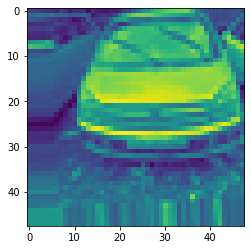

In [61]:
images = df.drop(columns = "label").values
plt.imshow(images[30].reshape(48,48))


In [62]:
X = df.drop(columns = ['label']).values


In [63]:
X

array([[247., 247., 247., ..., 124., 140., 144.],
       [ 57.,  46., 133., ...,  56.,  57.,  58.],
       [ 64.,  78.,  76., ..., 179., 159., 157.],
       ...,
       [140., 135., 123., ..., 236., 226., 219.],
       [125., 141., 151., ...,  81.,  77.,  85.],
       [154., 100.,  97., ...,  45.,  38.,  47.]])

In [64]:
y = df['label'].values

In [65]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5294, 2304), (2269, 2304), (5294,), (2269,))

In [70]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [71]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = gnb.predict(X_test)
accuray = accuracy_score(y_pred, y_test)

print("Accuracy:", accuray)


Accuracy: 0.3843102688408991


In [72]:
cm = confusion_matrix(y_test, y_pred)
